In [ ]:
# Google Drive share link
file_link_share = "https://drive.google.com/file/d/1IodHxt5BR9yVYaTXweGJ22I1zRW7jOrm/view?usp=sharing"

In [ ]:
file_id = file_link_share[file_link_share.find("d/")+2 : file_link_share.find("/v")]
print(file_id)

In [ ]:
# Download the file
!gdown "$file_id"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Simple linear regression

In [6]:
# y = mx + c
# x - single feature
# parameters - m&c

X = df["TV"]
y = df['sales']

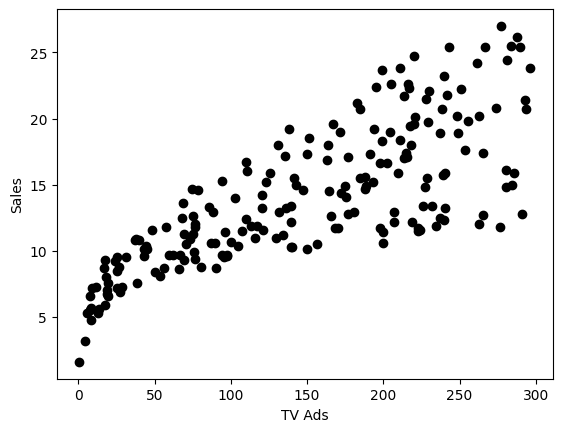

In [7]:
plt.scatter(X,y, c="black")
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.show()

In [8]:
# Get the Linear Regression

from sklearn.linear_model import LinearRegression

In [11]:
# Convert the data to 2-dimensional shape
X = X.values.reshape(-1,1)

In [12]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [13]:
X.shape

(200, 1)

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X,y)

LinearRegression()

In [23]:
#now you can already retrieve the coefficient and intercept
lr.coef_

array([0.04753664])

In [25]:
lr.intercept_

7.032593549127695

In [28]:
# prediction
# sales = 0.047 * TV + 7.032

# manual computation
y_predict = 0.04753664 * 500 +7.032593549127695

In [29]:
y_predict

30.800913549127692

In [31]:
# predict using sklearn

y_predict = lr.predict([[500]])
y_predict

array([30.80091377])

<function matplotlib.pyplot.show(close=None, block=None)>

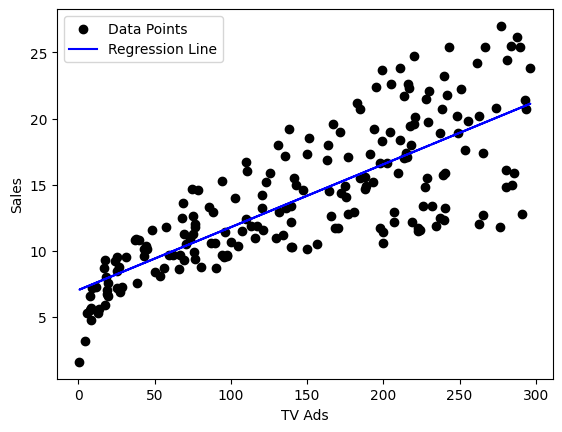

In [34]:
# plotting our data

y_pred = lr.predict(X)

plt.scatter(X, y, c="black", label = "Data Points")
plt.plot(X,y_pred, c="blue", label = "Regression Line")
plt.xlabel("TV Ads")
plt.ylabel("Sales")
plt.legend()
plt.show

In [36]:
# Determine if the Regression line is best fit using R2_Score method

from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.611875050850071

In [39]:
# This means 61% of variance we got in the output vs. the target columnt

# Multiple Linear Regression

In [40]:
X = df.drop(columns =["Unnamed: 0", 'sales'] )

In [41]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [42]:
y = df['sales']

In [43]:
lr = LinearRegression()
lr.fit(X,y)
lr.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [44]:
lr.intercept_

2.938889369459412

In [45]:
lr.predict([[200,40,20]])

c:\users\iamli\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([19.61226928])

In [47]:
y_pred = lr.predict(X)
r2_score(y,y_pred)

0.8972106381789522

In [48]:
# this means that there's nearly 90% of variance of our input vs. our target sales

# Other ways of evaluating the Linear Regression model

### mean_squared_error
### mean_absolute_error



In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
mean_squared_error(y, y_pred)

2.784126314510936

In [53]:
mean_squared_error(y, y_pred, squared = False) # this calculates the RMSE 
                                                # Root Mean Squared Error

1.6685701407225697

In [54]:
mean_absolute_error(y, y_pred)

1.2520112296870685